In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import random
from tqdm import tqdm

import matplotlib.pyplot as plt

## TESTS:
***

In [57]:
#Load the data and generate the graph

fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
df = df[(df['cmdCode'] == 1) & (df['yr'] == 2015)]

G = nx.from_pandas_edgelist(df,
                             source       = 'rt3ISO',
                             target       = 'pt3ISO',
                             edge_attr    =  'TradeValue',
                             create_using = nx.DiGraph())

In [4]:
countries_rt = df['rt3ISO'].unique()
countries_rt.sort() # if some element is nan sort fails!
countries_pt = df['pt3ISO'].unique()
countries_pt.sort()
commodities = df['cmdCode'].unique()
periods = df['yr'].unique()
print('Periods -> ', len(periods))
print('# of reporter countries -> ', len(countries_rt))
print('# of partner countries -> ', len(countries_pt))
print('# of commodities -> ',  len(commodities))

Periods ->  1
# of reporter countries ->  169
# of partner countries ->  233
# of commodities ->  23


In [5]:
commodities

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [46]:
k_in  = np.array(list(dict(G.in_degree()).values()))
k_out = np.array(list(dict(G.out_degree()).values()))
k     = np.array(list(dict(G.degree()).values()))
k_in.sum()/len(k_in)

20.216494845360824

In [50]:
(k**2).sum()/len(k) - 2* k.sum()/len(k)

3415.0

In [61]:
len(max(nx.weakly_connected_components(G), key=len))

194

In [79]:
to_remove = random.sample(G.edges(), 1000)

In [80]:
G_TEST = G.copy()
G_TEST.remove_edges_from(to_remove)

In [82]:
k_in  = np.array(list(dict(G.in_degree()).values()))
k_out = np.array(list(dict(G.out_degree()).values()))
k     = np.array(list(dict(G.degree()).values()))
k_in.sum()/len(k_in)

15.061855670103093

In [77]:
sorted(nx.weakly_connected_components(G), key=len, reverse=True)[1]

{'NIU'}

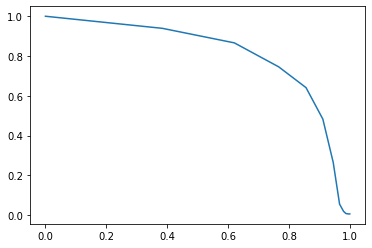

In [9]:
steps = 20
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
#frac_to_drop = np.linspace(0.001,0.999,steps)
frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    pf = 0
    for i in range(20):
        G_reduced = G.copy()
        to_remove = random.sample(G.edges(), int(f*n_edges))
        G_reduced.remove_edges_from(to_remove)
        #k = np.array(list(dict(G_reduced.degree()).values()))
        pf += len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append((pf/20) / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

In [61]:
unsorted_EBC = nx.edge_betweenness_centrality(G)#, weight='TradeValue')
sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))  
#unsorted_EBC

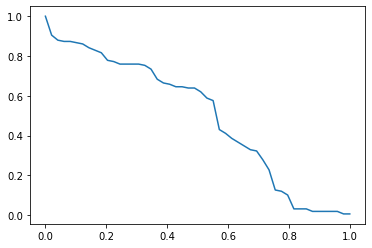

In [62]:
steps = 50
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
frac_to_drop = np.linspace(0.001,0.999,steps)
#frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    G_reduced = G.copy()
    to_remove = list(sorted_EBC.keys())[:int(f*n_edges)]
    G_reduced.remove_edges_from(to_remove)
    #k = np.array(list(dict(G_reduced.degree()).values()))
    pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append(pf / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

In [39]:
unsorted_strong = {(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
sorted_strong   = dict(sorted(unsorted_strong.items(), key=lambda item: item[1], reverse=True))  
#{(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
#sorted_strong

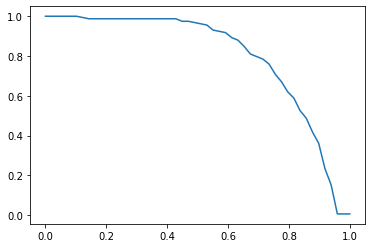

In [40]:
unsorted_strong = {(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
sorted_strong   = dict(sorted(unsorted_strong.items(), key=lambda item: item[1], reverse=True))  
steps = 50
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
frac_to_drop = np.linspace(0.001,0.999,steps)
#frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    G_reduced = G.copy()
    to_remove = list(sorted_strong.keys())[:int(f*n_edges)]
    G_reduced.remove_edges_from(to_remove)
    #k = np.array(list(dict(G_reduced.degree()).values()))
    pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append(pf / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

In [50]:
unsorted_DP = {(edge[0], edge[1]) : G.degree()[edge[0]]*G.degree()[edge[1]] for edge in G.edges()}
sorted_DP   = dict(sorted(unsorted_DP.items(), key=lambda item: item[1], reverse=True))  
#sorted_DP

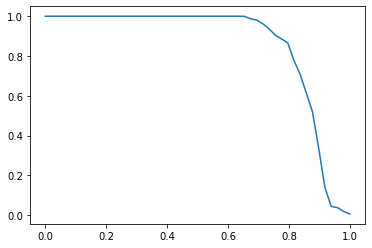

In [51]:
unsorted_DP = {(edge[0], edge[1]) : G.degree()[edge[0]]*G.degree()[edge[1]] for edge in G.edges()}
sorted_DP   = dict(sorted(unsorted_DP.items(), key=lambda item: item[1], reverse=True))  
steps = 50
n_nodes = len(G.nodes())
n_edges = len(G.edges())
# To obtain a probability we should divide by total number of nodes, but
# we are interested in the ration of probability, so we can avoid some calculations
P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
P_f = []
frac_to_drop = np.linspace(0.001,0.999,steps)
#frac_to_drop = 1 - np.logspace(0,-4,steps)
for f in frac_to_drop:
    G_reduced = G.copy()
    to_remove = list(sorted_DP.keys())[:int(f*n_edges)]
    G_reduced.remove_edges_from(to_remove)
    #k = np.array(list(dict(G_reduced.degree()).values()))
    pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
    P_f.append(pf / P_0)
    #print("f removed: ", f)
    #print("size of GC: ", len(max(nx.strongly_connected_components(G_reduced), key=len)))
    #print("Exist GC: ", (k**2).sum()/len(k) - 2* k.sum()/len(k) > 0)
plt.plot(frac_to_drop, P_f)

## Robustness:
***

To represent the robustness of the Network we are going to consider the probability of a node to belong to the Largest strongly(weakly) Connected Component, LCC w.r.t. the fraction f of removed links.

The probability is normalized w.r.t. the probability of belonging to LCC when no links are removed.

The robustness is tested for:
* Random attack: the links to be removed are chosen at random.
* BC attack: links are removed according to their betweenness centrality (BC), i.e. links with higher betweenness centrality are deleted first.
* BCw attack: links are removed according to their weighted betwennes centrality.
* Strong attack: links are removed in decreasing order of weight, i.e. links with higher weight are removed first and it represents an attack directed to strong links.

In [25]:
def test_robustness(G, strongly=True, plot=False, cmdLabel=1):
    steps     = 50
    rand_step = 20
    n_nodes = len(G.nodes())
    n_edges = len(G.edges())
    
    unsorted_EBC = nx.edge_betweenness_centrality(G)
    sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))
    unsorted_EBCw = nx.edge_betweenness_centrality(G, weight='TradeValue')
    sorted_EBCw   = dict(sorted(unsorted_EBCw.items(), key=lambda item: item[1], reverse=True))
    unsorted_strong = {(edge[0], edge[1]) : edge[2] for edge in G.edges(data='TradeValue')}
    sorted_strong   = dict(sorted(unsorted_strong.items(), key=lambda item: item[1], reverse=True))  
    #unsorted_DP = {(edge[0], edge[1]) : G.degree()[edge[0]]*G.degree()[edge[1]] for edge in G.edges()}
    #sorted_DP   = dict(sorted(unsorted_DP.items(), key=lambda item: item[1], reverse=True))  


    if (strongly):
        P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
    else:
        P_0 = len(max(nx.weakly_connected_components(G), key=len)) #/ n_nodes
    
    out = dict()
    P_f = [[],[],[]]
    P_f_rand = []
    frac_to_drop = np.linspace(0.001,0.999,steps)
    frac_to_drop_rand = 1 - np.logspace(0,-4,steps)
    # BC attack
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' BC_atk', leave=False):
        G_reduced = G.copy()
        to_remove = list(sorted_EBC.keys())[:int(f*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f[0].append(pf / P_0)
    # BCw attack
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' BCw_atk', leave=False):
        G_reduced = G.copy()
        to_remove = list(sorted_EBCw.keys())[:int(f*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f[1].append(pf / P_0)
    # Strong attack
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' Str_atk', leave=False):
        G_reduced = G.copy()
        to_remove = list(sorted_strong.keys())[:int(f*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f[2].append(pf / P_0)
    # Random atack
    for f in tqdm(frac_to_drop_rand, desc='cmd='+str(cmdLabel)+' Rand_atk', leave=False):
        pf = 0
        for i in range(20):
            G_reduced = G.copy()
            to_remove = random.sample(G.edges(), int(f*n_edges))
            G_reduced.remove_edges_from(to_remove)
            if (strongly):
                pf += len(max(nx.strongly_connected_components(G_reduced), key=len))
            else:
                pf += len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f_rand.append((pf/20) / P_0)

    out['Random attack'] = [frac_to_drop_rand, P_f_rand]
    out['BC attack'] = [frac_to_drop, P_f[0]]
    out['BCw attack'] = [frac_to_drop, P_f[1]]
    out['Strong attack'] = [frac_to_drop, P_f[2]]
    
    if (plot):
        plt.figure(figsize=[8,8])
        for key in out.keys():
            plt.plot(out[key][0], out[key][1], '-o', label=key, markersize=4)
        plt.xlabel('f')
        plt.ylabel('LCC')
        plt.legend()
        plt.show()
    
    return out

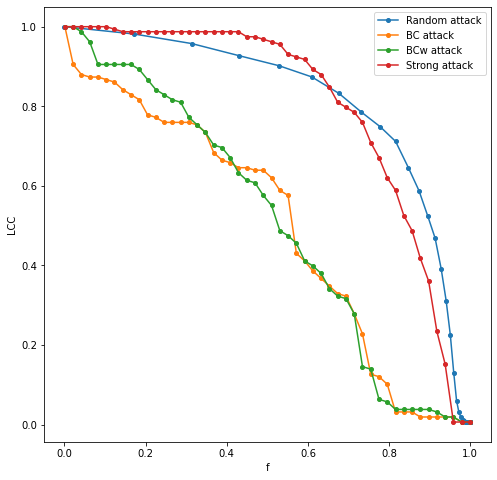

In [26]:
_ = test_robustness(G, strongly=True, plot=True)

In [75]:
fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)

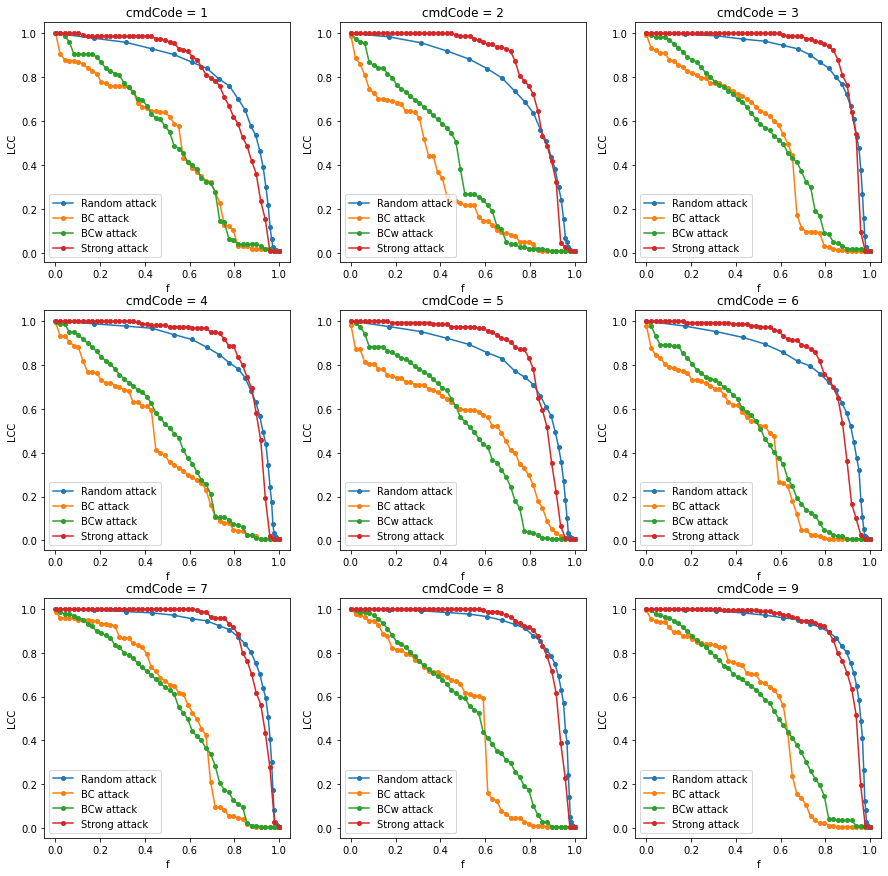

In [102]:
fig, ax = plt.subplots(3,3, figsize=[15,15])

for comm in range(1,10):

    G = nx.from_pandas_edgelist(df[(df['cmdCode'] == comm) & (df['yr'] == 2015)],
                                source       = 'rt3ISO',
                                target       = 'pt3ISO',
                                edge_attr    =  'TradeValue',
                                create_using = nx.DiGraph())
    results = test_robustness(G, plot=False, cmdLabel=comm)
    for key in results.keys():
        ax[(comm-1)//3, (comm-1)%3].plot(results[key][0], results[key][1], '-o', label=key, markersize=4)
    ax[(comm-1)//3, (comm-1)%3].set_xlabel('f')
    ax[(comm-1)//3, (comm-1)%3].set_ylabel('LCC')
    ax[(comm-1)//3, (comm-1)%3].set_title('cmdCode = '+str(comm))
    ax[(comm-1)//3, (comm-1)%3].legend()
plt.show()

In [27]:
fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
G = nx.from_pandas_edgelist(df[(df['cmdCode'] == 1) & (df['yr'] == 2015)],
                                source       = 'rt3ISO',
                                target       = 'pt3ISO',
                                edge_attr    =  'TradeValue',
                                create_using = nx.DiGraph())

In [31]:
cm1 = df.loc[(df.cmdCode == 1) & (df.yr == 2015)].reset_index() #######

In [44]:
def test_robustness2(df, plot=False, cmdLabel=1):
    df['norm_tv'] = df.TradeValue / df.groupby('rt3ISO')['TradeValue'].transform('sum')
    n_rt = len(np.unique(df.rt3ISO))
    n_edges = len(df)
    ix = list(df.index)
    ix.sort(key=list(df.norm_tv).__getitem__, reverse=True)
    steps = 50
    steps_rand = 20
    frac_to_drop_rand = np.linspace(0.001,0.999,steps_rand)
    frac_to_drop = np.logspace(-4,0,steps)
    #frac_to_drop = np.linspace(0.001,0.999,steps)
    out = {'Strong': [frac_to_drop,[]],
           'Random': [frac_to_drop_rand,[]]}
    
    # Strong Attack
    for f in tqdm(frac_to_drop, desc='cmd='+str(cmdLabel)+' Str_atk', leave=False):
        tmp = df.copy().reset_index()
        tmp.loc[ix[:int(f*n_edges)], 'norm_tv'] = 0
        out['Strong'][1].append(tmp.groupby('rt3ISO')['norm_tv'].sum().values.sum()/n_rt)
    
    # Random Attack
    for f in tqdm(frac_to_drop_rand, desc='cmd='+str(cmdLabel)+' Rand_atk', leave=False):
        mid = 0
        for ii in range(25):
            tmp = df.copy().reset_index()
            ix_rand = ix.copy()
            random.shuffle(ix_rand)
            tmp.loc[ix_rand[:int(f*n_edges)], 'norm_tv'] = 0
            mid += tmp.groupby('rt3ISO')['norm_tv'].sum().values.sum()
        
        out['Random'][1].append((mid/25)/n_rt)

    
    if (plot):
        plt.figure(figsize=[8,8])
        for key in out.keys():
            plt.plot(out[key][0], out[key][1], '-o', label=key, markersize=4)
        plt.xlabel('f')
        plt.ylabel('Avg % Imports')
        plt.legend()
        plt.show()
    
    return out

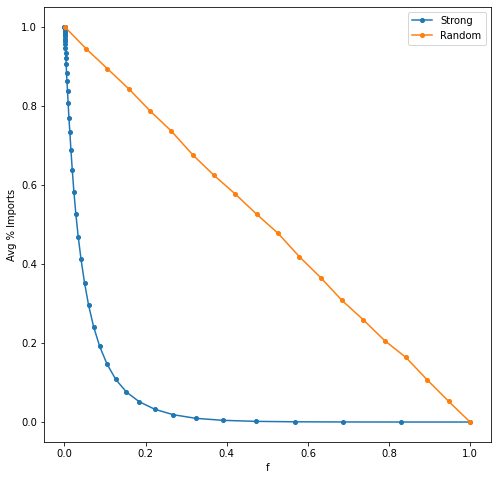

In [45]:
out = test_robustness2(cm1, plot=True)

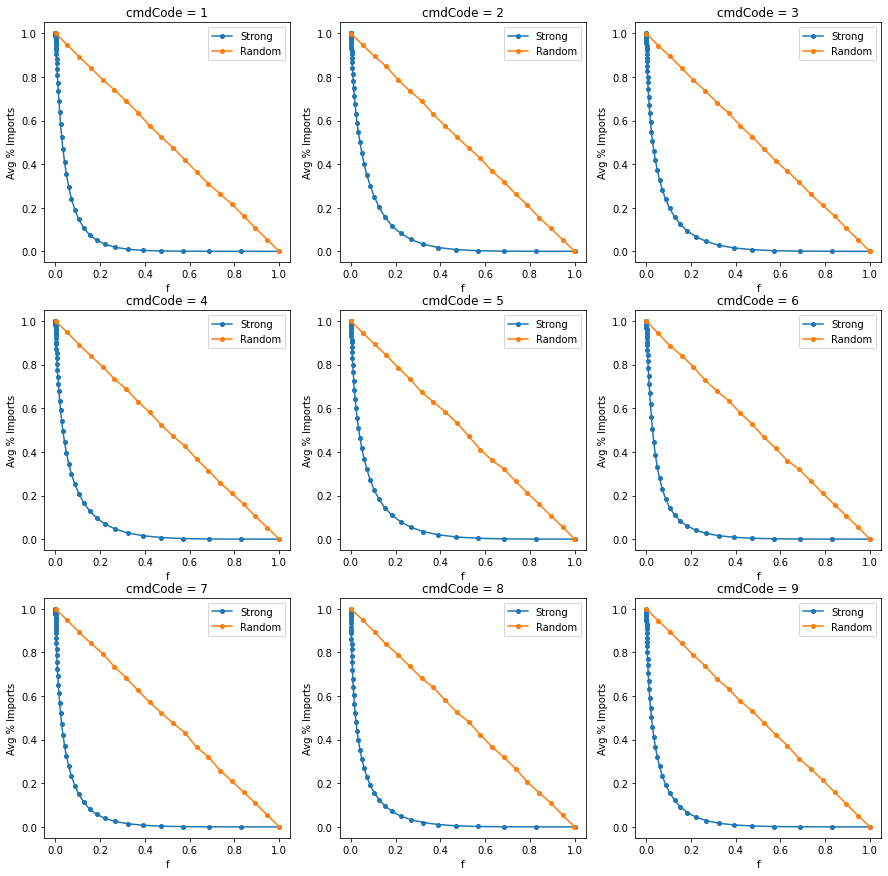

In [46]:
fig, ax = plt.subplots(3,3, figsize=[15,15])

fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)

for comm in range(1,10):
    
    comm_df = df.loc[(df.cmdCode == comm) & (df.yr == 2015)].reset_index()
    results = test_robustness2(comm_df, plot=False, cmdLabel=comm)
    for key in results.keys():
        ax[(comm-1)//3, (comm-1)%3].plot(results[key][0], results[key][1], '-o', label=key, markersize=4)
    ax[(comm-1)//3, (comm-1)%3].set_xlabel('f')
    ax[(comm-1)//3, (comm-1)%3].set_ylabel('Avg % Imports')
    ax[(comm-1)//3, (comm-1)%3].set_title('cmdCode = '+str(comm))
    ax[(comm-1)//3, (comm-1)%3].legend()
plt.show()

## Fast Functions
***

In [68]:
def fast_robustness(G, eps=0.5, strongly=True, label=''):
    '''
    It performs the BC attack and return the fraction for which the P drop below eps
    '''
    steps = 100
    n_nodes = len(G.nodes())
    n_edges = len(G.edges())
    unsorted_EBC = nx.edge_betweenness_centrality(G)
    sorted_EBC   = dict(sorted(unsorted_EBC.items(), key=lambda item: item[1], reverse=True))
    if (strongly):
        P_0 = len(max(nx.strongly_connected_components(G), key=len)) #/ n_nodes
    else:
        P_0 = len(max(nx.weakly_connected_components(G), key=len)) #/ n_nodes
    P_f = []
    frac_to_drop = np.linspace(0.001,0.999,steps)
    
    for f in tqdm(frac_to_drop, desc=str(label), leave=False):
        G_reduced = G.copy()
        to_remove = list(sorted_EBC.keys())[:int(f*n_edges)]
        G_reduced.remove_edges_from(to_remove)
        if (strongly):
            pf = len(max(nx.strongly_connected_components(G_reduced), key=len))
        else:
            pf = len(max(nx.weakly_connected_components(G_reduced), key=len))
        P_f.append(pf / P_0)
    ix = list(np.array(P_f) < eps).index(True)
    return frac_to_drop[ix]

def fast_robustness2(df, eps=0.5, label=''):
    '''
    It performs the Strong attack and return the fraction for which the P drop below eps
    '''
    df['norm_tv'] = df.TradeValue / df.groupby('rt3ISO')['TradeValue'].transform('sum')
    n_rt = len(np.unique(df.rt3ISO))
    n_edges = len(df)
    ix = list(df.index)
    ix.sort(key=list(df.norm_tv).__getitem__, reverse=True)
    steps = 200
    P_f = []
    frac_to_drop = np.logspace(-4,0,steps)
    for f in tqdm(frac_to_drop, desc=str(label), leave=False):
        tmp = df.copy().reset_index()
        tmp.loc[ix[:int(f*n_edges)], 'norm_tv'] = 0
        P_f.append(tmp.groupby('rt3ISO')['norm_tv'].sum().values.sum()/n_rt)
    ixx = list(np.array(P_f) < eps).index(True)
    return frac_to_drop[ixx]

In [102]:
fields = ['yr','rt3ISO','pt3ISO','cmdCode','TradeValue']
df = pd.read_csv("current_data/final_dataset.csv", skipinitialspace = True, usecols = fields)
years = np.unique(df.yr)
commodities = np.unique(df.cmdCode)
robustness = {'LCC'     : np.zeros((len(commodities), len(years))),
              'Imports' : np.zeros((len(commodities), len(years)))}
for yy,year in enumerate(years):
    for cc,comm in enumerate(commodities):
        tmp_df = df.loc[(df.cmdCode == comm) & (df.yr == year)].reset_index()
        tmp_G  = nx.from_pandas_edgelist(df[(df['cmdCode'] == comm) & (df['yr'] == year)],
                                         source       = 'rt3ISO',
                                         target       = 'pt3ISO',
                                         edge_attr    =  'TradeValue',
                                         create_using = nx.DiGraph())
        robustness['LCC'][cc,yy] = fast_robustness(tmp_G, eps=0.5, strongly=True, 
                                                   label='LCC comm='+str(comm)+' year='+str(year))
        robustness['Imports'][cc,yy] =fast_robustness2(tmp_df, eps=0.2, 
                                                       label='Imports comm='+str(comm)+' year='+str(year))


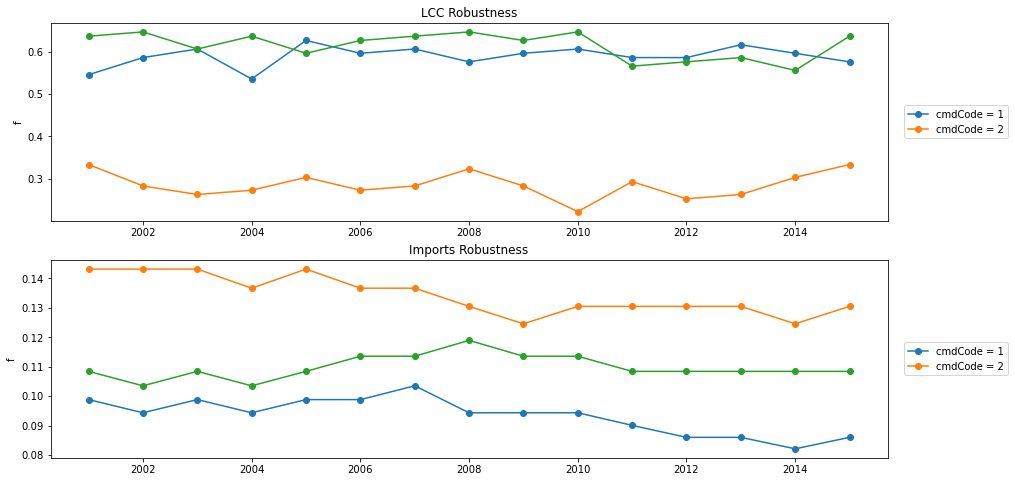

In [101]:
fig, ax = plt.subplots(2*(1+len(commodities)//5),1, figsize=[15,8])

for cc, comm in enumerate(commodities):
    ax[2*(cc//5)].plot(years, robustness['LCC'][cc], '-o', label='cmdCode = '+str(comm))
    ax[2*(cc//5)+1].plot(years, robustness['Imports'][cc], '-o', label='cmdCode = '+str(comm))
    if (cc%5 == 1):
        ax[2*(cc//5)].legend(loc='center right', bbox_to_anchor=(1.15,0.5))
        ax[2*(cc//5)+1].legend(loc='center right', bbox_to_anchor=(1.15,0.5))
        ax[2*(cc//5)].set_title('LCC Robustness')
        ax[2*(cc//5)+1].set_title('Imports Robustness')
        ax[2*(cc//5)].set_ylabel('f')
        ax[2*(cc//5)+1].set_ylabel('f')
plt.show()

In [99]:
14//3

4